In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [6]:
from tensorboard.backend.event_processing import event_accumulator

def parse_tensorboard(path, scalar):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _absorb_print = ea.Reload()

    if 'CelebAGAN' in path:
        iter_per_epoch = 1272.0
    elif 'DemoRegWDL' in path:
        iter_per_epoch = 1800.0
    return {'epoch': np.array([ea.Scalars(scalar)[i].step/iter_per_epoch for i in range(len(ea.Scalars(scalar)))]),
            'value': np.array([ea.Scalars(scalar)[i].value for i in range(len(ea.Scalars(scalar)))])}


In [7]:
def plot_case(path, scalar, n, color):
    meanres = {}

    results = parse_tensorboard(f'{path}/version_0', scalar)
    print(results['value'][-1])
    meanres['epoch'] = results['epoch']
    meanres['value'] = results['value']/n

    plt.plot(results['epoch'], results['value'], color=color, alpha=0.05)

    for i in range(1, n):
        results = parse_tensorboard(f'{path}/version_{i}', scalar)
        plt.plot(results['epoch'], results['value'], color=color, alpha=0.05)
        print(results['value'][-1])
        meanres['value'] += results['value']/n

    return meanres

out_DemoRegWDL5_100_-9.2103_nan_0.0100_0.0000_20.0000
1.6827530579903438e-13
1.5199844854985045e-11
2.134412958876286e-11
5.999434022491146e-12
3.7009981884716936e-11


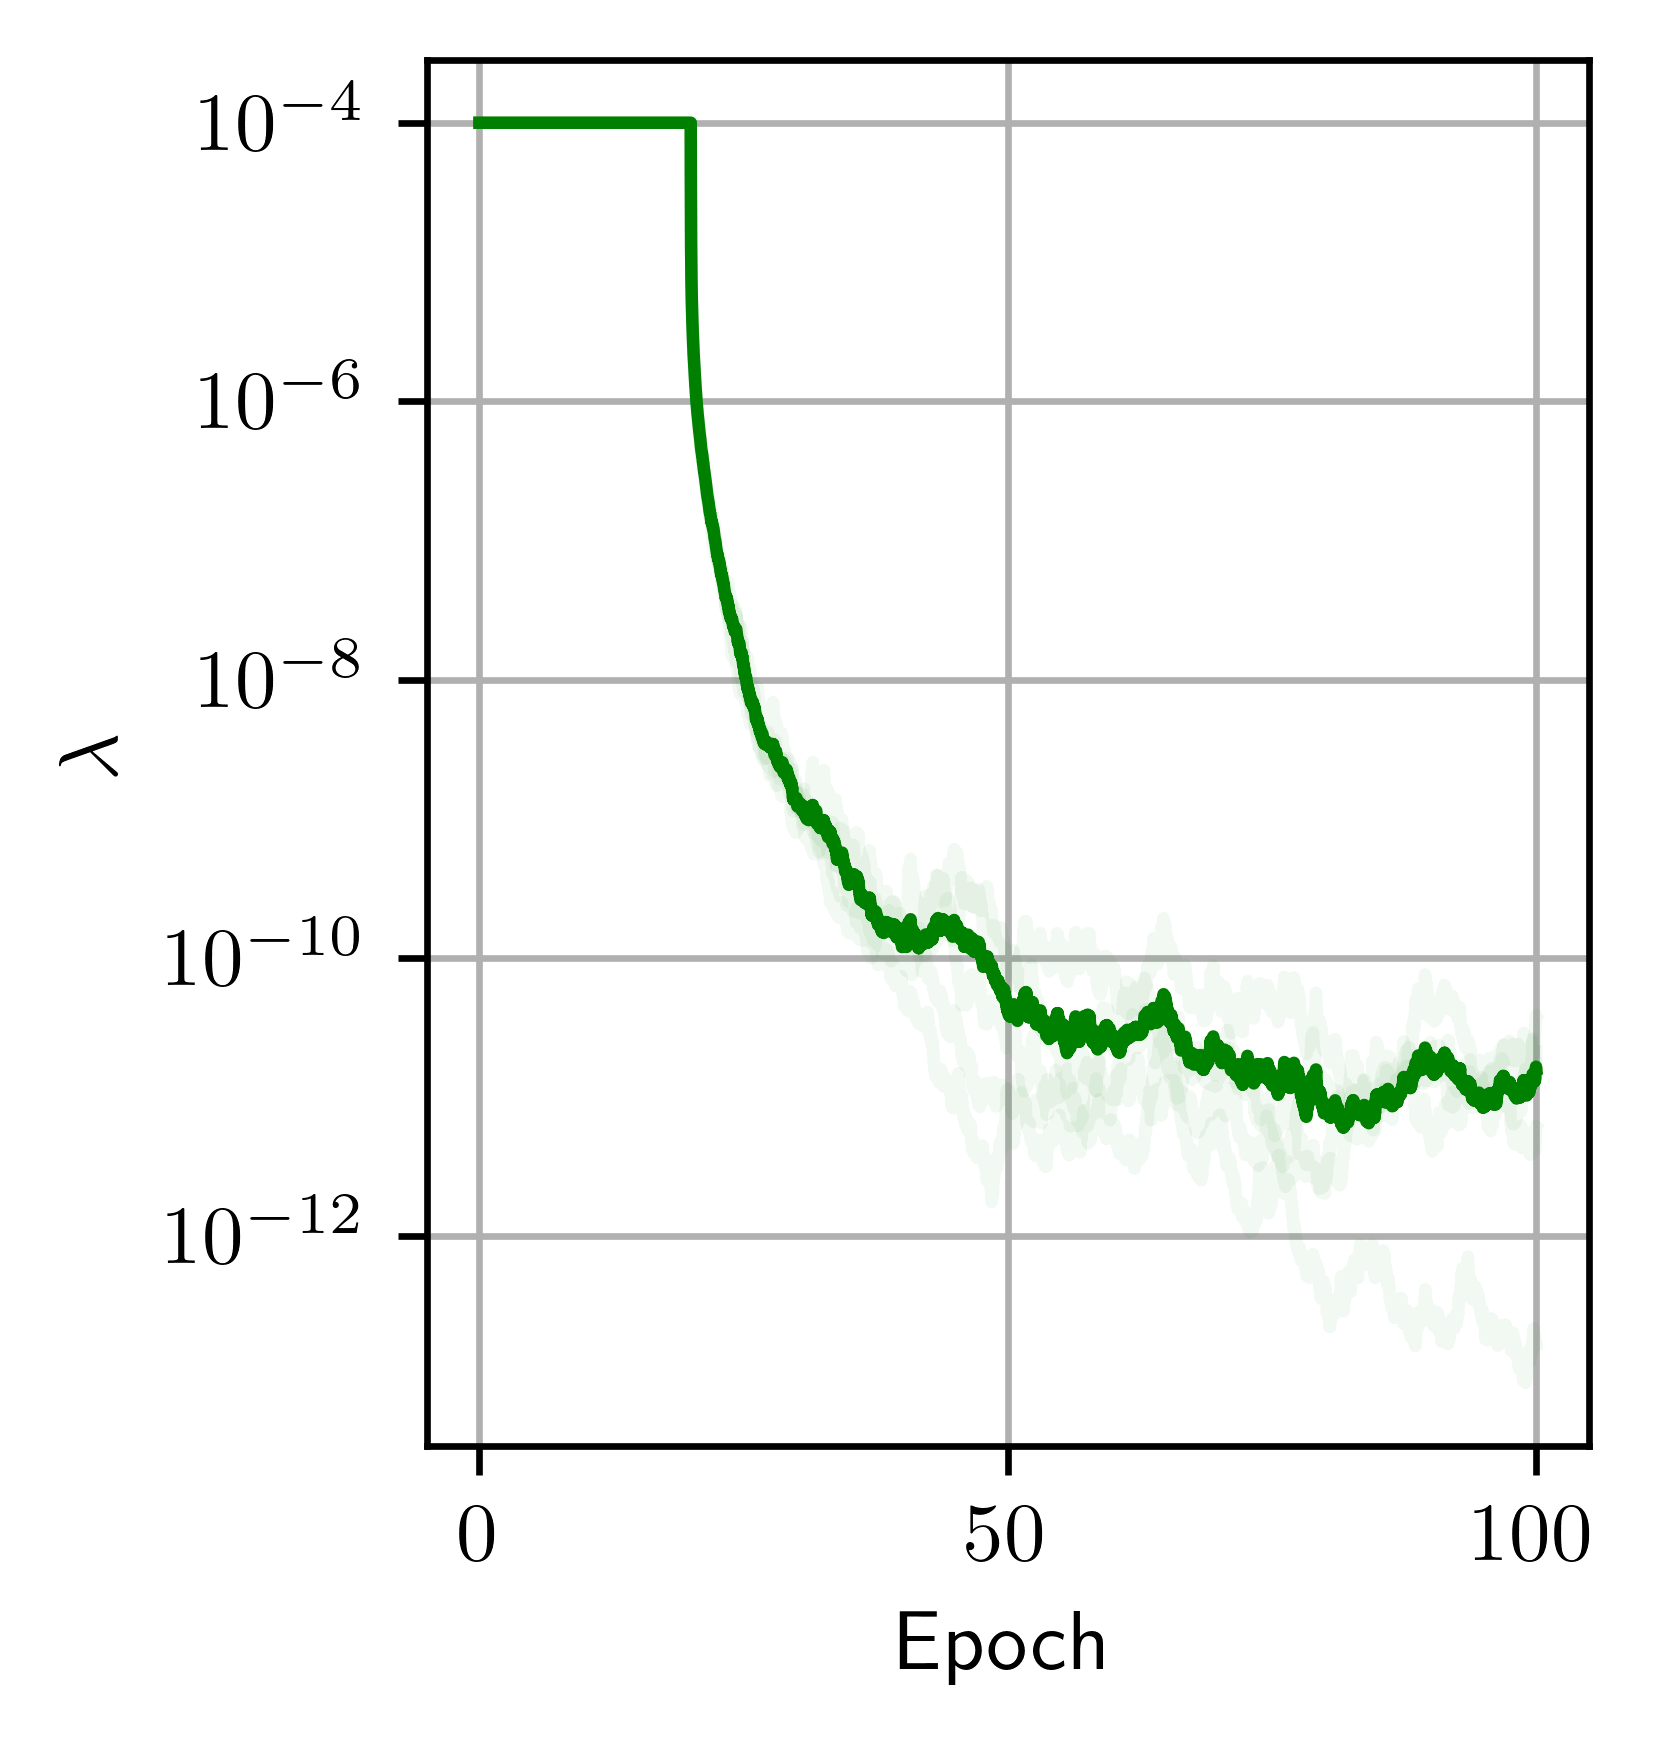

In [8]:
scalar = 'contvar'
#scalar = 'train_loss'
n = 5
labels = [f'out_DemoRegWDL5_100_{lambda0}_nan_0.0100_0.0000_20.0000' for lambda0 in [-9.2103]]
#labels = [f'out_CelebAGAN_20_{lambda0}_nan_0.0100_0.0000_0.0000' for lambda0 in [-13.8155]]

plt.figure(figsize=(2.5, 3), dpi=600)

for label, color, linetype in zip(labels, ['green'], ['-']):
    print(label)
    meanres = plot_case(label, scalar, n, color)

    if 'nan_nan' in label:
        plotlabel = 'No cont.'
    else:
        plotlabel = 'With cont.'#f'$\lambda_0 = \exp({lambda0})$'
    plt.plot(meanres['epoch'], meanres['value'], color=color, alpha=1, label=plotlabel, linestyle=linetype)

plt.xlabel('Epoch')
plt.ylabel('$\lambda$')
plt.yscale('log')
plt.grid()
#plt.legend(loc='best')